# Import Model and Data in loaders

In [1]:
import os
from pathlib import Path
p = Path.cwd().resolve()
while p != p.parent and not (p / 'requirements.txt').exists() and not (p / 'data').exists():
    p = p.parent

os.chdir(str(p/"src"))

from model import SmallCNN
from data import build_dataloaders

model = SmallCNN()

train_loader, val_loader, test_loader, meta = build_dataloaders(data_root=os.path.join(p, 'data'), size=128, batch_size=64)
model_out = os.path.join(p, 'experiments')

Saved 17380 samples to experiments/splits/train_split.csv
Saved 2165 samples to experiments/splits/val_split.csv
Saved 2165 samples to experiments/splits/test_split.csv
Discovered 21710 samples in 10 classes.
Train/val/test split: 17380/2165/2165


# TRAIN THE MODEL

#### Baseline (Augmentation Tier 0)

In [ ]:
from train import train_x_epoch
import torch

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = None

val_losses0, val_accuracies0, train_losses0 = train_x_epoch(
    model, train_loader, criterion=criterion, optimizer=optimizer, epochs=5, scheduler=scheduler, val_loader=val_loader, seed=67, augTier=0
)

#### Comparison (Augmentation Tier 1)

In [ ]:
val_losses1, val_accuracies1, train_losses1 = train_x_epoch(
    model, train_loader, criterion=criterion, optimizer=optimizer, epochs=5, scheduler=scheduler, val_loader=val_loader, seed=67, augTier=1
)

#### Comparison (Augmentation Tier 2)

In [ ]:
val_losses2, val_accuracies2, train_losses2 = train_x_epoch(
    model, train_loader, criterion=criterion, optimizer=optimizer, epochs=5, scheduler=scheduler, val_loader=val_loader, seed=67, augTier=2
)

#### Comparison (Augmentation Tier 3)

In [ ]:
val_losses3, val_accuracies3, train_losses3 = train_x_epoch(
    model, train_loader, criterion=criterion, optimizer=optimizer, epochs=5, scheduler=scheduler, val_loader=val_loader, seed=67, augTier=3
)

# Plotting Loss and Accuracies

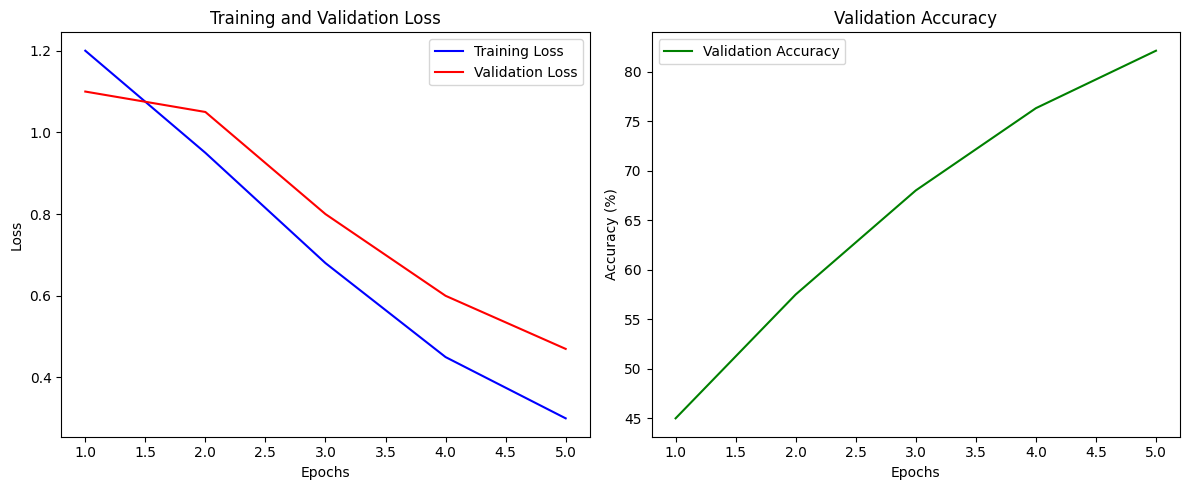

Final Evaluation on Validation Set:


NameError: name 'criterion' is not defined

In [ ]:
from utils import plot
from eval import evaluateClassAccurracy

plot(val_losses0, val_accuracies0, train_losses0, dest='../plots/aug_tier_0.png')
plot(val_losses1, val_accuracies1, train_losses1, dest='../plots/aug_tier_1.png')
plot(val_losses2, val_accuracies2, train_losses2, dest='../plots/aug_tier_2.png')
plot(val_losses3, val_accuracies3, train_losses3, dest='../plots/aug_tier_3.png')

print("Final Evaluation on Validation Set:")
evaluateClassAccurracy(model, val_loader, criterion, 10)